# LIF Population Statistics Visualization

## Tier 1: Mean and Variance of Connectivities

 - [x] Load data -> dataframe.
 - [x] Arp through weight variances, plot {mean vs. synch}.
 - [x] Arp through means, plot {variance vs. synch}.
 - [x] Try making a 3D surface plot (plotly).
 - [x] Iterate data acquisition -> better plots.
 - [ ] Make some 3D plots (plotly)

In [104]:
### Import Box ###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

## Load Data

<AxesSubplot:>

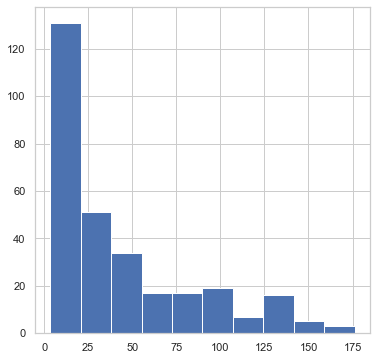

In [105]:
# Loading Data
df = pd.read_csv('data_2.csv', names =['mean', 'std', 'max_spikes', 'synch', 'synch_std'])
df['max_spikes'].hist()

In [106]:
stds = df['std'].unique()
means = df['mean'].unique()
df

,mean,std,max_spikes,synch,synch_std
0,-0.933333,0.1,4.133333,0.046123,0.000747
1,-0.933333,0.2,4.600000,0.046142,0.001060
2,-0.933333,0.3,5.333333,0.045589,0.001025
3,-0.933333,0.4,6.066667,0.045358,0.001550
4,-0.933333,0.5,7.200000,0.044810,0.001975
...,...,...,...,...,...
295,1.000000,0.6,144.400000,0.058899,0.002800
296,1.000000,0.7,162.733333,0.059439,0.002421
297,1.000000,0.8,167.466667,0.058241,0.002057
298,1.000000,0.9,153.933333,0.057419,0.002839


## Initial Plots

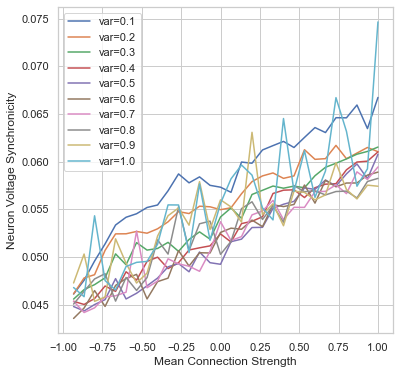

In [107]:
# Arp through variances, plot {mean vs. synch}:

for std in stds:
    x = df[df['std'] == std]['mean'].to_numpy()
    y = df[df['std'] == std]['synch'].to_numpy()
    plt.plot(x,y, label='var={}'.format(std))
    plt.xlabel('Mean Connection Strength')
    plt.ylabel('Neuron Voltage Synchronicity')
    # plt.title('Connection Strength vs. Synchronicity (weight variannce = {})'.format(std))
plt.legend()
plt.show()

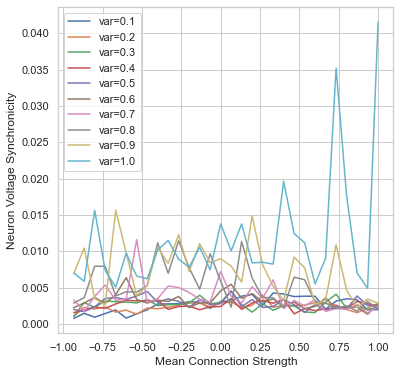

In [108]:
# Arp through variances, plot {mean vs. synch}:

for std in stds:
    x = df[df['std'] == std]['mean'].to_numpy()
    y = df[df['std'] == std]['synch_std'].to_numpy()
    plt.plot(x,y, label='var={}'.format(std))
    plt.xlabel('Mean Connection Strength')
    plt.ylabel('Neuron Voltage Synchronicity')
    # plt.title('Connection Strength vs. Synchronicity (weight variannce = {})'.format(std))
plt.legend()
plt.show()

## Actual Plots

In [109]:
# Making a proper z array by hand.
means = df['mean'].unique()
variances = df['std'].unique()

In [110]:
z = np.zeros([len(means), len(variances)])

In [112]:
for i in range(len(means)):
    for j in range(len(variances)):
        z[i,j] = df[df['mean'] == means[i]][df['std'] == variances[j]]['synch'].values[0]
        

/var/folders/m7/d57gmhzs1px67_c5z__d8ydw0000gn/T/ipykernel_10930/4279186973.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



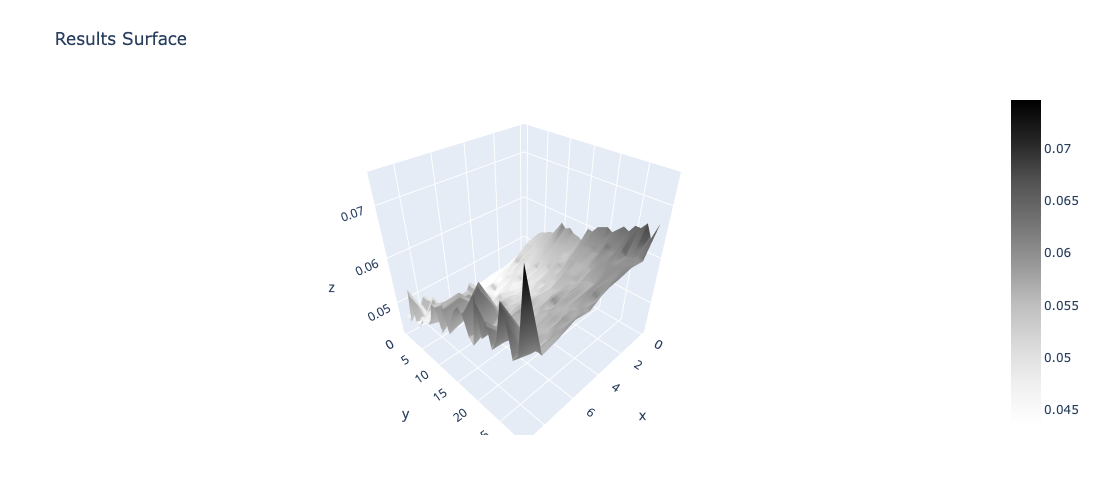

In [127]:
fig = go.Figure(data=[go.Surface(z=z, colorscale='Greys')])

fig.update_layout(title='Results Surface', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

In [114]:
sns.set(rc = {'figure.figsize':(6,6)})

In [118]:
sns.set(style="whitegrid")

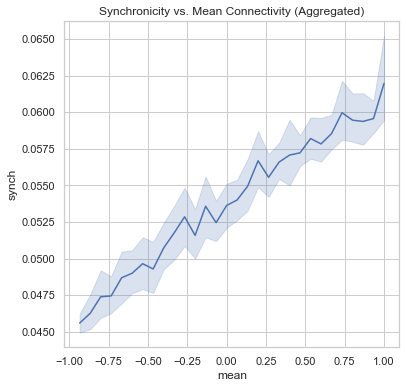

In [119]:
sns.lineplot(y="synch", x="mean", data=df)
plt.title("Synchronicity vs. Mean Connectivity (Aggregated)")
plt.savefig("synch_vs_mean.png", dpi=300)

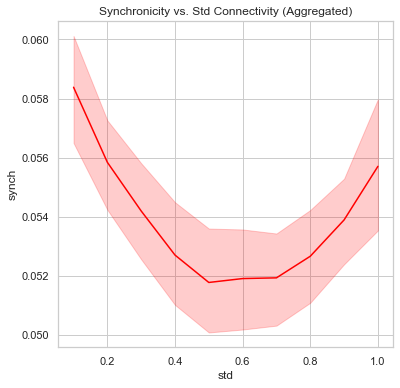

In [120]:
sns.lineplot(y="synch", x="std", color='red', data=df)
plt.title("Synchronicity vs. Std Connectivity (Aggregated)")
plt.savefig("synch_vs_std.png", dpi=300)

In [122]:
# # Synch vs _VARIANCE_.
# svs = z.sum(axis=0)/len(means)
# plt.plot(variances, svs)
# plt.title('Mean Synchronicity vs. Variance')
# plt.xlabel('variance')
# plt.ylabel('synchronicity')

# datum = {
#     'variance': svs,
#     'synchronicity': variances,
#     'std_spec': svs,
    
# }

# datum = pd.DataFrame(data=datum)

# datum

# sns.lineplot(x="variance", data=datum)

# ## Synch vs. MEAN
# svm = z.sum(axis=1)/len(variances)
# plt.plot(means, svm)
# plt.title('Mean Synchronicity vs. Mean Connection Strength')
# plt.xlabel('connection strength mean')
# plt.ylabel('synchronicity')